In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
loan_data = pd.read_csv('loan_data.csv')
loan_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y


In [3]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381 entries, 0 to 380
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            381 non-null    object 
 1   Gender             376 non-null    object 
 2   Married            381 non-null    object 
 3   Dependents         373 non-null    object 
 4   Education          381 non-null    object 
 5   Self_Employed      360 non-null    object 
 6   ApplicantIncome    381 non-null    int64  
 7   CoapplicantIncome  381 non-null    float64
 8   LoanAmount         381 non-null    float64
 9   Loan_Amount_Term   370 non-null    float64
 10  Credit_History     351 non-null    float64
 11  Property_Area      381 non-null    object 
 12  Loan_Status        381 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 38.8+ KB


In [4]:
loan_data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,381.000000,381.000000,381.000000,370.000000,351.000000
mean,3579.845144,1277.275381,104.986877,340.864865,0.837607
std,1419.813818,2340.818114,28.358464,68.549257,0.369338
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2600.000000,0.000000,90.000000,360.000000,1.000000
50%,3333.000000,983.000000,110.000000,360.000000,1.000000
75%,4288.000000,2016.000000,127.000000,360.000000,1.000000
max,9703.000000,33837.000000,150.000000,480.000000,1.000000


In [5]:
loan_data.isna().sum()

Loan_ID               0
Gender                5
Married               0
Dependents            8
Education             0
Self_Employed        21
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     11
Credit_History       30
Property_Area         0
Loan_Status           0
dtype: int64

In [6]:
loan_data.dropna().isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [7]:
loan_data.dropna(inplace=True)

In [8]:
loan_data.duplicated().sum()

np.int64(0)

In [9]:
loan_data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

### Data analysis

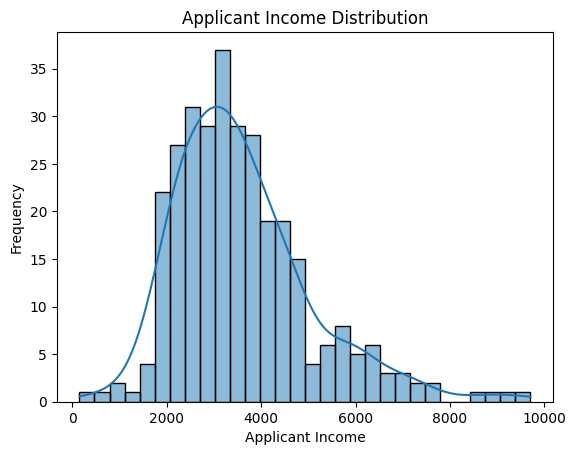

In [10]:
sns.histplot(loan_data['ApplicantIncome'], kde=True,bins=30)
plt.title('Applicant Income Distribution')
plt.xlabel('Applicant Income')
plt.ylabel('Frequency')
plt.show()

C:\Users\PC\AppData\Local\Temp\ipykernel_27996\174674139.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=loan_data, x='Loan_Status', palette='Set2')


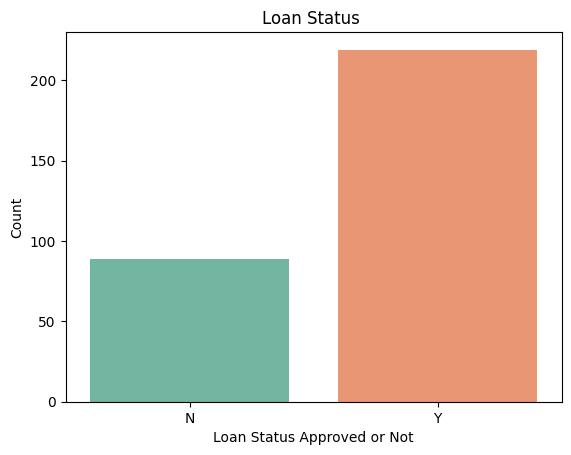

In [11]:
sns.countplot(data=loan_data, x='Loan_Status', palette='Set2')
plt.title('Loan Status ')
plt.xlabel('Loan Status Approved or Not')
plt.ylabel('Count')
plt.show()

In [12]:
loan_data.groupby("Education")["LoanAmount"].mean()

Education
Graduate        105.344978
Not Graduate    102.531646
Name: LoanAmount, dtype: float64

C:\Users\PC\AppData\Local\Temp\ipykernel_27996\1922663909.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Education", y="LoanAmount", data=loan_data, palette="Set2")


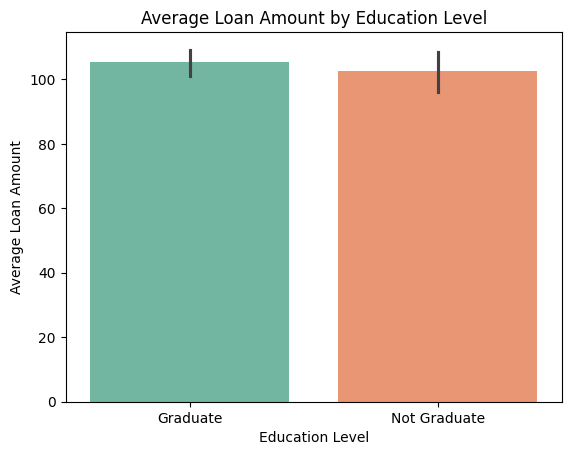

In [13]:
sns.barplot(x="Education", y="LoanAmount", data=loan_data, palette="Set2")
plt.title('Average Loan Amount by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Average Loan Amount')
plt.show()

C:\Users\PC\AppData\Local\Temp\ipykernel_27996\1599078167.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Property_Area", y="LoanAmount", data=loan_data, palette="Set2")


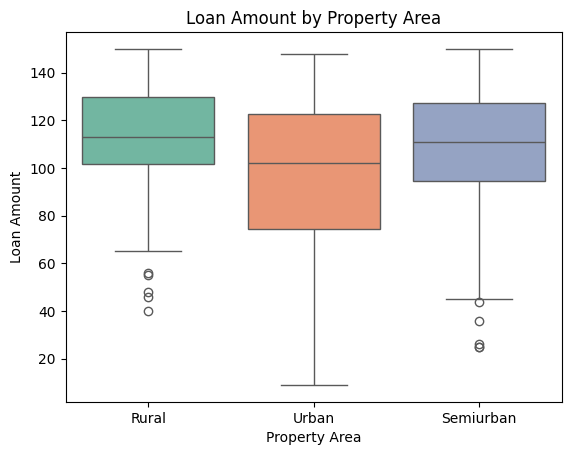

In [14]:
sns.boxplot(x="Property_Area", y="LoanAmount", data=loan_data, palette="Set2")
plt.title('Loan Amount by Property Area')
plt.xlabel('Property Area')
plt.ylabel('Loan Amount')
plt.show()

<Axes: ylabel='count'>

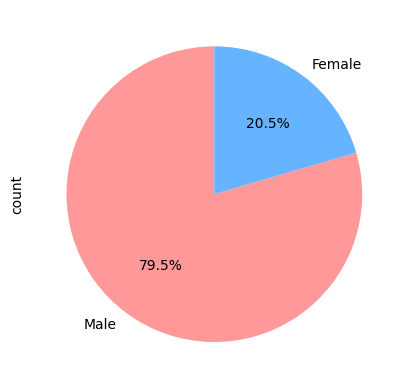

In [15]:
loan_data["Gender"].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff'])

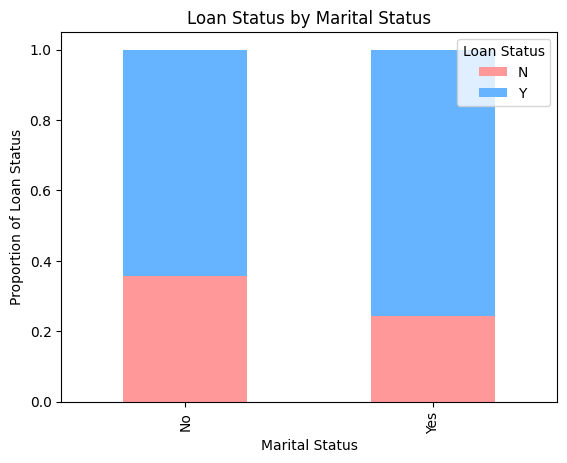

In [16]:
loan_data.groupby("Married")["Loan_Status"].value_counts(normalize=True).unstack().plot(kind='bar', stacked=True, color=['#ff9999','#66b3ff']).plot(kind='bar', stacked=True, color=['#ff9999','#66b3ff'])
plt.title('Loan Status by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Proportion of Loan Status')
plt.legend(title='Loan Status', loc='upper right')

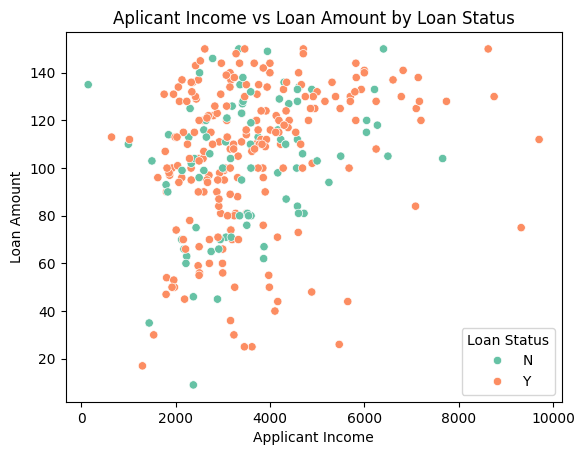

In [17]:
sns.scatterplot(x='ApplicantIncome', y='LoanAmount', data=loan_data, hue='Loan_Status', palette='Set2')
plt.title("Aplicant Income vs Loan Amount by Loan Status")
plt.xlabel("Applicant Income")
plt.ylabel("Loan Amount")
plt.legend(title='Loan Status')
plt.show()

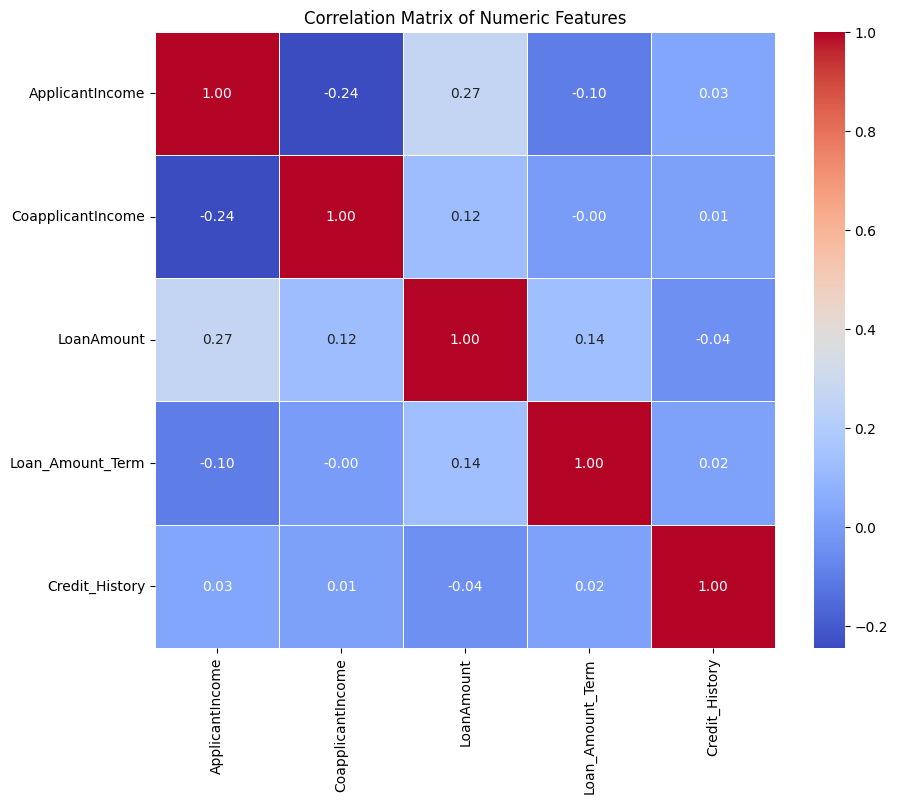

In [18]:
numeric_loan_data = loan_data.select_dtypes(include=[np.number])
correlation_matrix = numeric_loan_data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix of Numeric Features')
plt.show()

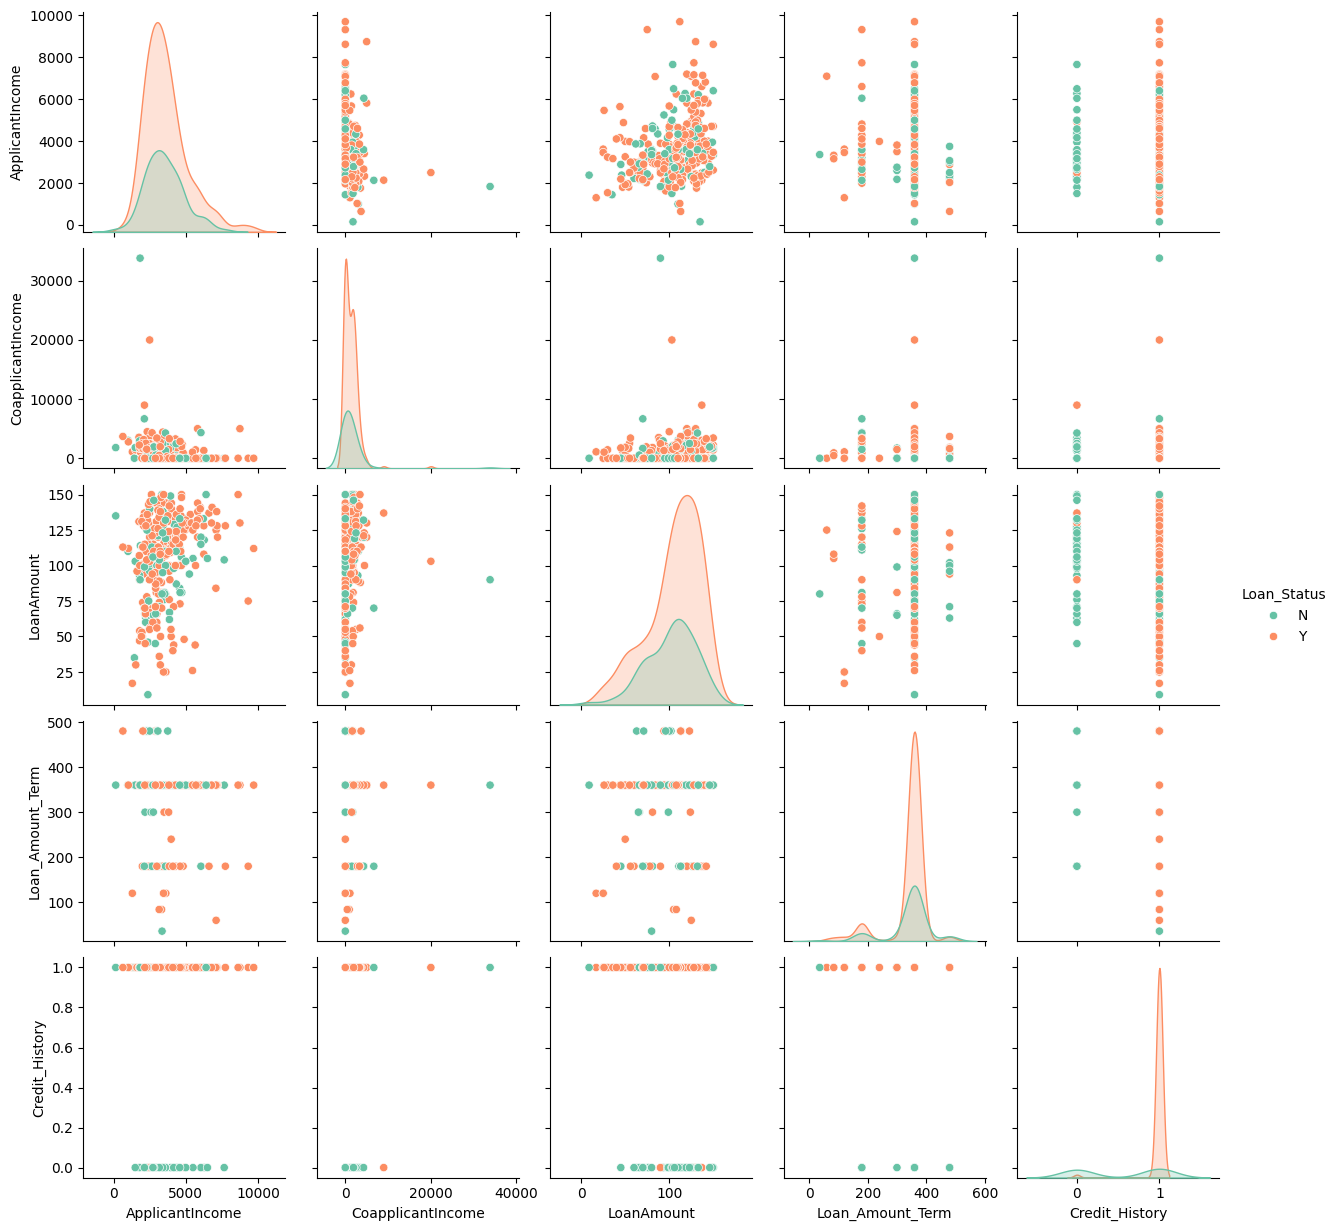

In [19]:
sns.pairplot(loan_data, hue='Loan_Status', diag_kind='kde', palette='Set2')
plt.show()

In [20]:
loan_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y


### Feature Enginneering

In [21]:
X = loan_data[["Married", "Education", "ApplicantIncome", "LoanAmount","Credit_History","Property_Area"]]
y = loan_data['Loan_Status']

In [22]:
X

,Married,Education,ApplicantIncome,LoanAmount,Credit_History,Property_Area
0,Yes,Graduate,4583,128.0,1.0,Rural
1,Yes,Graduate,3000,66.0,1.0,Urban
2,Yes,Not Graduate,2583,120.0,1.0,Urban
3,No,Graduate,6000,141.0,1.0,Urban
4,Yes,Not Graduate,2333,95.0,1.0,Urban
...,...,...,...,...,...,...
376,Yes,Graduate,5703,128.0,1.0,Urban
377,Yes,Graduate,3232,108.0,1.0,Rural
378,No,Graduate,2900,71.0,1.0,Rural
379,Yes,Graduate,4106,40.0,1.0,Rural


In [23]:
y # N is 1 and Y is 0 

0      N
1      Y
2      Y
3      Y
4      Y
      ..
376    Y
377    Y
378    Y
379    Y
380    N
Name: Loan_Status, Length: 308, dtype: object

In [24]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
y = label_encoder.fit_transform(y)
y

array([0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1,

In [25]:
X

,Married,Education,ApplicantIncome,LoanAmount,Credit_History,Property_Area
0,Yes,Graduate,4583,128.0,1.0,Rural
1,Yes,Graduate,3000,66.0,1.0,Urban
2,Yes,Not Graduate,2583,120.0,1.0,Urban
3,No,Graduate,6000,141.0,1.0,Urban
4,Yes,Not Graduate,2333,95.0,1.0,Urban
...,...,...,...,...,...,...
376,Yes,Graduate,5703,128.0,1.0,Urban
377,Yes,Graduate,3232,108.0,1.0,Rural
378,No,Graduate,2900,71.0,1.0,Rural
379,Yes,Graduate,4106,40.0,1.0,Rural


In [26]:
X["Education"] = label_encoder.fit_transform(X["Education"])
X["Married"] = label_encoder.fit_transform(X["Married"])
X["Property_Area"] = label_encoder.fit_transform(X["Property_Area"])
X

C:\Users\PC\AppData\Local\Temp\ipykernel_27996\2169688629.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Education"] = label_encoder.fit_transform(X["Education"])
C:\Users\PC\AppData\Local\Temp\ipykernel_27996\2169688629.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Married"] = label_encoder.fit_transform(X["Married"])
C:\Users\PC\AppData\Local\Temp\ipykernel_27996\2169688629.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row

,Married,Education,ApplicantIncome,LoanAmount,Credit_History,Property_Area
0,1,0,4583,128.0,1.0,0
1,1,0,3000,66.0,1.0,2
2,1,1,2583,120.0,1.0,2
3,0,0,6000,141.0,1.0,2
4,1,1,2333,95.0,1.0,2
...,...,...,...,...,...,...
376,1,0,5703,128.0,1.0,2
377,1,0,3232,108.0,1.0,0
378,0,0,2900,71.0,1.0,0
379,1,0,4106,40.0,1.0,0


In [27]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)
X

array([[ 0.81539246, -0.58734842,  0.67389339,  0.79689813,  0.41364557,
        -1.34675568],
       [ 0.81539246, -0.58734842, -0.41036528, -1.31665281,  0.41364557,
         1.23767266],
       [ 0.81539246,  1.70256694, -0.6959849 ,  0.52418188,  0.41364557,
         1.23767266],
       ...,
       [-1.22640329, -0.58734842, -0.47885919, -1.14620515,  0.41364557,
        -1.34675568],
       [ 0.81539246, -0.58734842,  0.34717742, -2.20298062,  0.41364557,
        -1.34675568],
       [-1.22640329, -0.58734842,  0.67389339,  0.96734579, -2.41752858,
        -0.05454151]], shape=(308, 6))

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [29]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)
print("Logistic Regression Accuracy:", log_reg.score(X_test, y_test))
print("Logistic Regression Predictions:", y_pred)

Logistic Regression Accuracy: 0.8064516129032258
Logistic Regression Predictions: [1 0 1 1 1 0 1 1 0 1 1 1 1 1 1 0 1 0 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1
 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1]
